In [1]:
import analyze_results_code
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
import pickle

/home/guiu/Projects/CONT_SCR_CRV_REC/contingencies-screening/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# GLOBAL ANALYSIS

## Load ranked contingencies

In [2]:
df_contg = analyze_results_code.load_df("/home/guiu/Projects/CONT_SCR_CRV_REC/Data/Results/")

Loading data from base path: /home/guiu/Projects/CONT_SCR_CRV_REC/Data/Results/
Found 1108 '*contg_df.csv' files to load.
Loaded 50 files...
Loaded 100 files...
Loaded 150 files...
Loaded 200 files...
Loaded 250 files...
Loaded 300 files...
Loaded 350 files...
Loaded 400 files...
Loaded 450 files...
Loaded 500 files...
Loaded 550 files...
Loaded 600 files...
Loaded 650 files...
Loaded 700 files...
Loaded 750 files...
Loaded 800 files...
Loaded 850 files...
Loaded 900 files...
Loaded 950 files...
Loaded 1000 files...
Loaded 1050 files...
Loaded 1100 files...
Concatenating 1108 DataFrames...
Loaded DataFrame shape before dropna: (911950, 16)
Final DataFrame shape after dropna: (870942, 16)


## Show DynaFlow simulation failures
Show all contingencies where DynaFlow has failed for the set of simulations provided.

In [3]:
df_contg[df_contg["STATUS"] == "HDS"].sort_values("N_ITER", ascending=False)

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
.VICHL71BAIXA,0.000000,31.833924,0.000000,44,16,9.068684,0,0.000000,0.0,0,6,20,5191.1621,HDS,100000.0,2024-09-05 21:20:00
.DIEL 7 .MEED 2,0.000000,0.000000,0.000000,43,135,1397.807311,0,141.055556,170.0,0,556,246,67163.3252,HDS,100000.0,2024-12-22 05:10:00
SEREIL71VIELM,0.000000,188.161221,74.015924,42,16,15.091828,0,22.500000,640.0,0,36,52,3759.5546,HDS,100000.0,2024-12-19 04:30:00
FLAMAL71MENUE,22.803284,116.082737,44.174725,41,25,158.873537,0,90.000000,0.0,2,51,134,15297.4108,HDS,100000.0,2024-12-01 06:10:00
D.BURL72TABAR,0.000000,4.785629,6.834914,39,23,19.048087,0,5.000000,0.0,0,12,7,5601.5545,HDS,100000.0,2024-12-19 04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
.ROND 7 .TURB 1,0.000000,0.000000,0.000000,12,29,8.055221,0,5.000000,0.0,0,21,40,4736.6805,HDS,100000.0,2024-12-03 05:55:00
.PIOS 7 .VENA 1,0.000000,0.000000,0.000000,12,18,25.329622,0,0.000000,0.0,0,100,0,4976.4333,HDS,100000.0,2025-03-08 14:50:00
CHAFFL71COULA,4.102491,15.149315,131.840055,12,30,10.288332,0,0.000000,0.0,0,15,40,4873.7643,HDS,100000.0,2024-12-02 09:15:00


In [4]:
df_contg[df_contg["STATUS"] == "HDS"].index.value_counts()

NAME
MANDAL71PEUP5      462
.HERNL71ARGIA       64
P.CORL71SSAL7       15
.MORE 7 .PLAN 1     14
BUGEYL74SSV.O       14
                  ... 
B.TOLL71CERN         1
.GRAF 7 .OSTE 1      1
.MITT 7 .UCHT 1      1
FLAMAL73MENUE        1
MAZURL71REVI5        1
Name: count, Length: 523, dtype: int64

## Show Hades non-convergence
Show all contingencies where Hades has failed for the set of simulations provided.

In [5]:
df_contg[df_contg["STATUS"] == "DWO"]

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
.ALGR 7 .LIXH 1,0.0,0.0,0.0,0,11,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2024-06-06 05:25:00
.ALGR 7 .LIXH 1,0.0,0.0,0.0,0,12,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2024-06-06 08:20:00
.ALGR 7 .LIXH 1,0.0,0.0,0.0,14,11,0.0,0,0.0,0.0,0,0,0,Nonrealistic solution,DWO,100000.0,2024-06-06 19:55:00
.ALGR 7 .LIXH 1,0.0,0.0,0.0,14,11,0.0,0,0.0,0.0,0,0,0,Nonrealistic solution,DWO,100000.0,2024-06-06 20:25:00
.ALGR 7 .LIXH 1,0.0,0.0,0.0,14,11,0.0,0,0.0,0.0,0,0,0,Nonrealistic solution,DWO,100000.0,2024-06-06 16:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COCHEL71P.AND,0.0,0.0,0.0,13,13,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2025-03-07 16:45:00
ALBERL71COCHE,0.0,0.0,0.0,14,16,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2025-03-07 11:35:00
COCHEL71P.AND,0.0,0.0,0.0,13,13,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2025-03-07 11:35:00


In [6]:
df_contg[df_contg["STATUS"] == "DWO"].index.value_counts()

NAME
.ALGR 7 .LIXH 1    134
.ESC5 7 .FUEN 1     95
COCHEL71P.AND       81
.AYOR 7 .COFR 1     34
ALBERL71COCHE       27
.BREI 7 .LAUF 1     12
.ENS  7 .ZWOL 2      8
.ARAG 7 .ESC5 1      7
.ARAG 7 .ASCO 1      6
B.CARL71BIANC        5
.OLME 7 .ROMI 1      3
.VER5 7 Z.VER 1      1
.VER5 7 Z.VER 2      1
ALBERL73G.ILE        1
.OSTE 7 .PRAD 1      1
.PAFF 7 .ROMM 2      1
.PAFF 7 .ROMM 1      1
.OSTE 7 .VOHR 1      1
.PULV 7 .VOHR 1      1
.PULV 7 .SECH 1      1
.ROMM 7 .SECH 3      1
.ROMM 7 .SECH 2      1
.ROMM 7 .SECH 1      1
.HOHE 7 .VOHR 1      1
.GRAF 7 .OSTE 1      1
.GRAF 7 .VOHR 1      1
.GRAF 7 .PULV 1      1
.HOHE 7 .RHEI 1      1
.HOHE 7 .RHEI 2      1
.HOHE 7 .PULV 1      1
.GROH 7 .SECH 1      1
.HER8 7 .HOHE 1      1
.HERB 7 .VOHR 1      1
.DIEL 7 .ROMM 1      1
.DIEL 7 .MEED 2      1
.GRAF 7 .GROH 1      1
.FLRO 7 .OSTE 1      1
.OSTE 7 .PRAD 2      1
.BRAU 7 .ROMM 1      1
.DIEL 7 .MEED 1      1
.DIEL 7 .GROH 1      1
Name: count, dtype: int64

## Worst contingencies (For cases where both converged)

In [7]:
df_contg = df_contg.sort_values(by="REAL_SCORE", ascending=False)
df_contg[df_contg["STATUS"] == "BOTH"]

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
.BRAU 7 .ROMM 1,66.364878,3539.017207,857.364078,41,133,687.929746,0,2495.833333,0.0,0,1621,788,133636.8398,BOTH,21620.0,2024-06-07 04:40:00
.FLRO 7 .OSTE 1,0.000000,0.000000,0.000000,38,133,686.813554,0,2445.833333,0.0,0,2014,785,127750.3032,BOTH,21260.0,2024-06-07 04:40:00
.DIEL 7 .ROMM 1,0.000000,0.000000,0.000000,39,133,686.813554,0,2445.833333,0.0,0,4559,785,128620.6781,BOTH,21260.0,2024-06-07 04:40:00
.HOHE 7 .PULV 1,0.000000,0.000000,0.000000,38,133,686.813554,0,2445.833333,0.0,0,4485,785,128572.2916,BOTH,21260.0,2024-06-07 04:40:00
.HER8 7 .HOHE 1,0.000000,0.000000,0.000000,38,133,686.813554,0,2445.833333,0.0,0,1459,785,127565.6801,BOTH,21260.0,2024-06-07 04:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
.ABAN 7 .ZIER 2,0.000000,0.000000,0.000000,15,13,1.000001,0,0.000000,0.0,3,1,0,3988.0398,BOTH,120.0,2024-12-29 03:55:00
.ABAN 7 .ZIER 2,1.001762,0.000000,5.712894,19,13,0.000000,0,0.000000,0.0,8,3,0,4002.1241,BOTH,120.0,2024-12-15 00:10:00
.ABAN 7 .ZIER 1,0.000000,6.000090,7.338854,15,13,0.000000,0,0.000000,0.0,2,3,0,3975.3914,BOTH,120.0,2024-12-15 21:15:00


## Correlation Matrix

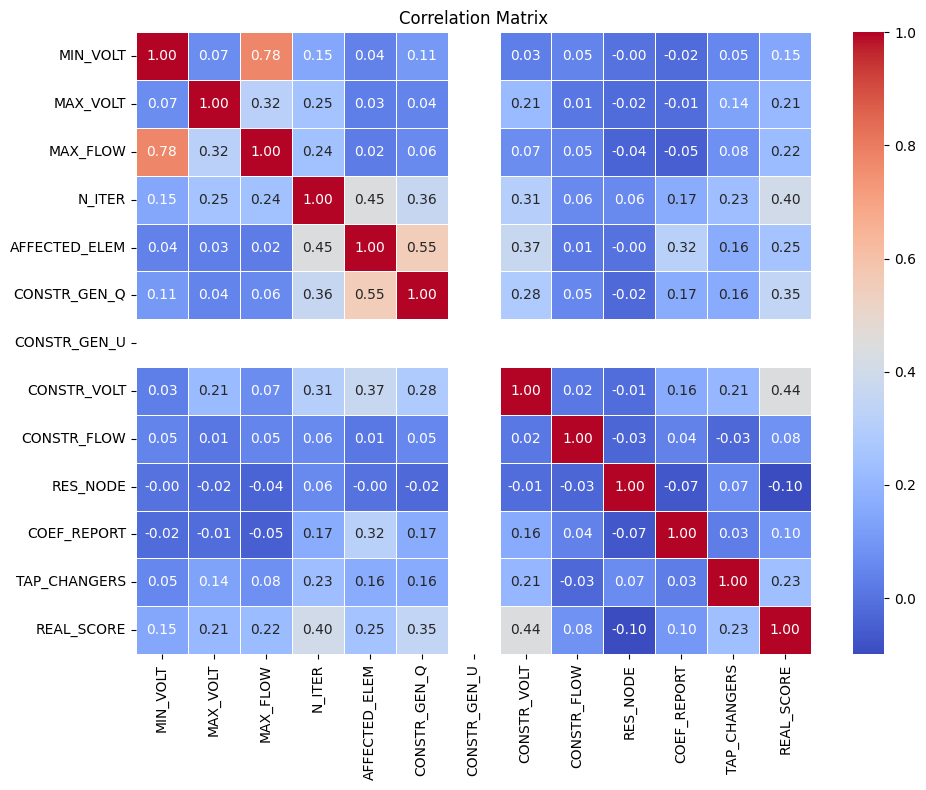

In [8]:
df_filtered = df_contg[df_contg["STATUS"] == "BOTH"]
analyze_results_code.plot_correlation_matrix(df_filtered)

## All-time top N most different contingencies (using the Real score, median-based statistic)

In [9]:
analyze_results_code.all_time_top(df_filtered)


Top 10 Entries (All Time Median Score):

1: BLAYAL74BRAUD - 4640.00
2: CIVAUL72VALDI - 3140.00
3: DONZAL72GOLF5 - 3060.00
4: DONZAL71GOLF5 - 3000.00
5: CIVAUL71VALDI - 2840.00
6: .HERNL71ARGIA - 2740.00
7: .OSTE 7 .VOHR 1 - 2680.00
8: ARGIAL71CANTE - 2620.00
9: BLAYAL72BRAUD - 2570.00
10: REALTL72TAVEL - 2560.00


## Week day top N most different contingencies (using the Real score, median-based statistic)

In [10]:
analyze_results_code.week_day_top(df_filtered)

/home/guiu/Projects/CONT_SCR_CRV_REC/contingencies-screening/src/contingencies_screening/notebook_analysis/analyze_results_code.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["W_DAY"] = df_filtered["DATE"].dt.weekday



Top Entries by Day of the Week (Median Score):


Monday:

  BLAYAL74BRAUD
  CIVAUL72VALDI
  DONZAL72GOLF5
  CIVAUL71VALDI
  DONZAL71GOLF5
  .OSTE 7 .VOHR 1
  BLAYAL72BRAUD
  ARGIAL71CANTE
  .HERNL71ARGIA
  CHOO2L71LONNY
  DONZAL71LESQU
- REALTL72TAVEL
- REALTL71TAVEL
- .HOHE 7 .RHEI 1

Tuesday:

  BLAYAL74BRAUD
  DONZAL72GOLF5
  DONZAL71GOLF5
  CIVAUL72VALDI
  BLAYAL72BRAUD
- .HERNL71ARGIA
  DONZAL71LESQU
- ARGIAL71CANTE
  CIVAUL71VALDI
  .OSTE 7 .VOHR 1
- CHOO2L71LONNY
-+.DIEL 7 .MEED 1
-+BLAYAL71BRAUD
-+BVIL7L72GAUGL

Wednesday:

  BLAYAL74BRAUD
  DONZAL72GOLF5
  CIVAUL72VALDI
  DONZAL71GOLF5
  CIVAUL71VALDI
- BLAYAL72BRAUD
  DONZAL71LESQU
-+GRAV5L75WARAN
-+CUBNEL72DONZA
-+GRAV5L76WARAN
-+CUBNEL71DONZA
  .OSTE 7 .VOHR 1
-+SSEA2L71VERGE
 +.HOHE 7 .RHEI 2

Thursday:

  BLAYAL74BRAUD
 +.HERNL71ARGIA
  CIVAUL72VALDI
 +ARGIAL71CANTE
  DONZAL72GOLF5
  .OSTE 7 .VOHR 1
  CIVAUL71VALDI
  DONZAL71GOLF5
  DONZAL71LESQU
-+.HOHE 7 .RHEI 1
- .HOHE 7 .RHEI 2
 +.PULV 7 .SECH 1
 +BIPOLL72MANDA
-+BIP

## Month top N most different contingencies (using the Real score, median-based statistic)

In [11]:
analyze_results_code.month_top(df_filtered)

/home/guiu/Projects/CONT_SCR_CRV_REC/contingencies-screening/src/contingencies_screening/notebook_analysis/analyze_results_code.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["MONTH"] = df_filtered["DATE"].dt.month



Top Entries by Month (January, February, June - Median Score):


June:

  BLAYAL74BRAUD
-+.HOHE 7 .RHEI 1
  DONZAL71GOLF5
  CIVAUL72VALDI
  DONZAL72GOLF5
-+.HER8 7 .HOHE 1
  BLAYAL72BRAUD
  .OSTE 7 .VOHR 1
-+.BRAU 7 .ROMM 1
-+.FLRO 7 .OSTE 1
- .HOHE 7 .VOHR 1
-+.DIEL 7 .ROMM 1
-+.DIEL 7 .GROH 1
-+.GRAF 7 .VOHR 1

September:

  BLAYAL74BRAUD
  CIVAUL72VALDI
 +CIVAUL71VALDI
- BLAYAL72BRAUD
-+SSEA2L71VERGE
  DONZAL71GOLF5
 +DONZAL71LESQU
-+BIPOLL72MANDA
  DONZAL72GOLF5
-+AVOI5L74CHIN2
-+.VICHL71BAIXA
  .OSTE 7 .VOHR 1
-+CUBNEL71DONZA
-+CUBNEL72DONZA

December:

  BLAYAL74BRAUD
-+REALTL72TAVEL
-+REALTL71TAVEL
-+ARGIAL71CANTE
- DONZAL71GOLF5
  CIVAUL72VALDI
  DONZAL72GOLF5
 +.HERNL71ARGIA
  CIVAUL71VALDI
-+GRAV5L72WARAN
  .OSTE 7 .VOHR 1
- DONZAL71LESQU
-+CHOO2L71LONNY
 +FLAMAL72MENUE

March:

  BLAYAL74BRAUD
  DONZAL72GOLF5
  CIVAUL72VALDI
-+MTEZ5L71RUEYR
  CIVAUL71VALDI
-+BIPOLL71MANDA
  FLAMAL72MENUE
  .OSTE 7 .VOHR 1
-+CAZARL72VERFE
-+BIPOLL72MANDA
  .HERNL71ARGIA
-+CUBNEL71DONZA
-+CUB

## Hour top N most different contingencies (using the Real score, median-based statistic)

In [12]:
analyze_results_code.hour_top(df_filtered)

/home/guiu/Projects/CONT_SCR_CRV_REC/contingencies-screening/src/contingencies_screening/notebook_analysis/analyze_results_code.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["HOUR"] = df_filtered["DATE"].dt.hour



Top Entries by Hour of the Day (Median Score):


Hour 00:

  BLAYAL74BRAUD
  CIVAUL72VALDI
  .OSTE 7 .VOHR 1
  .HERNL71ARGIA
- REALTL71TAVEL
- REALTL72TAVEL
  DONZAL71GOLF5
  ARGIAL71CANTE
  CIVAUL71VALDI
  .HOHE 7 .RHEI 1
  DONZAL72GOLF5
  GRAV5L72WARAN
  .PULV 7 .SECH 1
  .HOHE 7 .RHEI 2

Hour 01:

  BLAYAL74BRAUD
  CIVAUL72VALDI
  .OSTE 7 .VOHR 1
- .HERNL71ARGIA
- ARGIAL71CANTE
- DONZAL71GOLF5
- DONZAL72GOLF5
  .HOHE 7 .RHEI 1
- CIVAUL71VALDI
  .HOHE 7 .RHEI 2
  .PULV 7 .SECH 1
- GRAV5L72WARAN
 +.HOHE 7 .VOHR 1
 +.GRAF 7 .GROH 1

Hour 02:

  BLAYAL74BRAUD
  .OSTE 7 .VOHR 1
  CIVAUL72VALDI
  .PULV 7 .SECH 1
  .HOHE 7 .RHEI 1
  .HOHE 7 .VOHR 1
  .HOHE 7 .RHEI 2
 +.GRAF 7 .OSTE 1
  .GRAF 7 .GROH 1
-+.OSTE 7 .PRAD 1
-+.OSTE 7 .PRAD 2
 +.HER8 7 .HOHE 1
-+.PAFF 7 .ROMM 2
-+.PAFF 7 .ROMM 1

Hour 03:

  BLAYAL74BRAUD
  .OSTE 7 .VOHR 1
  CIVAUL72VALDI
  .HOHE 7 .RHEI 2
  .HOHE 7 .RHEI 1
  .HOHE 7 .VOHR 1
 +CIVAUL71VALDI
  .PULV 7 .SECH 1
  .GRAF 7 .GROH 1
-+.FLRO 7 .OSTE 1
-+.DIEL 7 .GROH 1

## Calculate quantiles

In [13]:
for i in range(0, 100, 5):
    print(i / 100, df_contg["REAL_SCORE"].quantile(i / 100))

0.0 120.0
0.05 830.0
0.1 950.0
0.15 1020.0
0.2 1120.0
0.25 1180.0
0.3 1240.0
0.35 1300.0
0.4 1360.0
0.45 1420.0
0.5 1480.0
0.55 1540.0
0.6 1620.0
0.65 1680.0
0.7 1760.0
0.75 1860.0
0.8 1960.0
0.85 2110.0
0.9 2340.0
0.95 2800.0


## Hour boxplot of real scores

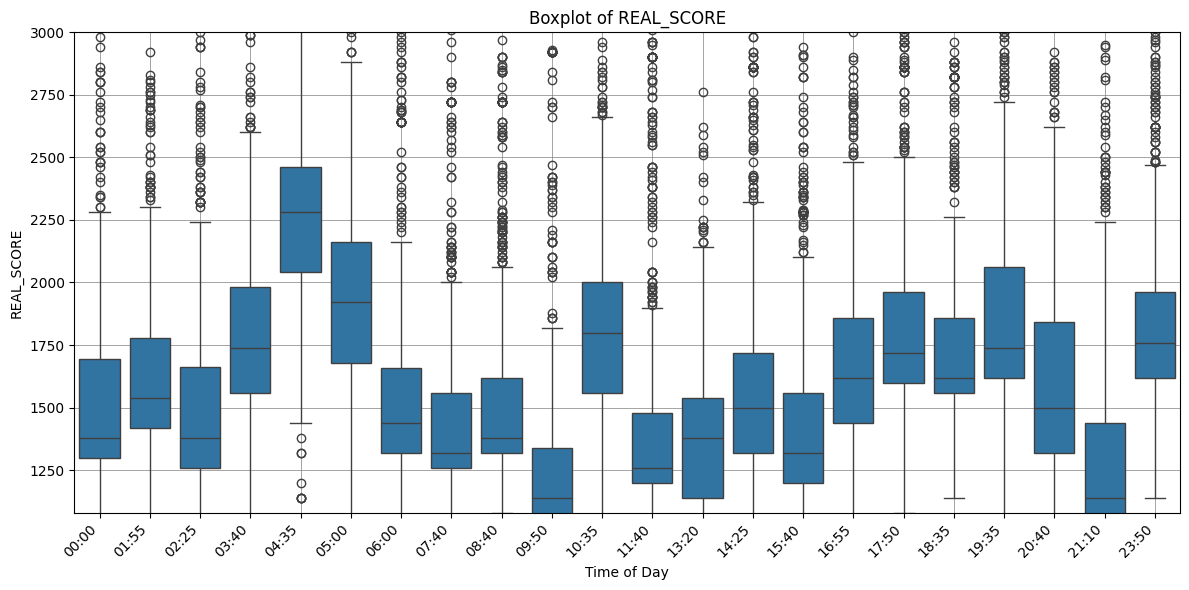

In [14]:
analyze_results_code.hour_boxplot(df_contg, "REAL_SCORE")

## Day boxplot of real scores

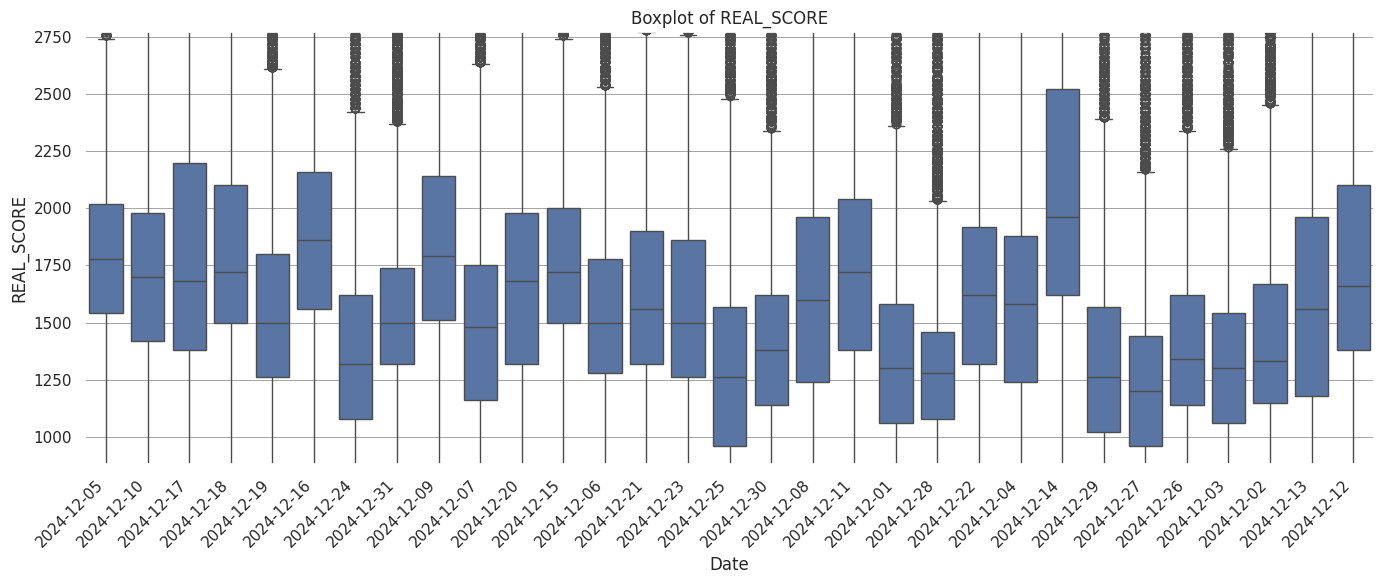

In [15]:
analyze_results_code.day_boxplot(df_contg, "REAL_SCORE")

## Real score histogram

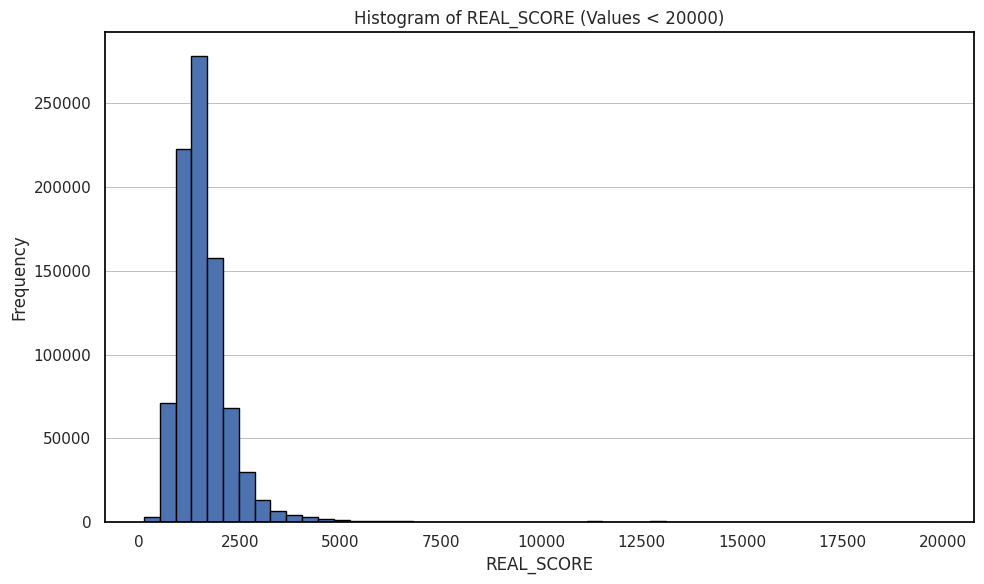

In [16]:
analyze_results_code.score_histogram(df_contg, "REAL_SCORE")